<a href="https://colab.research.google.com/github/holmon-alp/heart-attack-predictor/blob/main/heart_attack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ✅ Our task today is to predict the probability of a heart attack ❤ using some of the natural and biological characteristics of a person.  The dataset was downloaded from kagge.com.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1st step. Loading dataset

In [9]:
df = pd.read_csv("/content/heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## About this dataset

**Age** : Age of the patient

**Sex** : Sex of the patient

**exng**: exercise induced angina (1 = yes; 0 = no)

**caa**: number of major vessels (0-3)

**cp** : Chest Pain type chest pain type
```
  Value 1: typical angina
  Value 2: atypical angina
  Value 3: non-anginal pain
  Value 4: asymptomatic
```
**trtbps** : resting blood pressure (in mm Hg)

**chol** : cholestoral in mg/dl fetched via BMI sensor

**fbs** : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

**oldpeak** : Previous peak

**slp** : Slope

**thall** : Thal rate

**restecg** : resting electrocardiographic results
```
  Value 0: normal
  Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
  Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
```
**thalach** : maximum heart rate achieved

**target**(output) : 0 = less chance of heart attack, 1 = more chance of heart attack



In [10]:
print("DF shape:", df.shape)
print("NaN values:\n", df.isna().sum())

df.describe()

DF shape: (303, 14)
NaN values:
 age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Correlation

All values is full and we can check correlation.

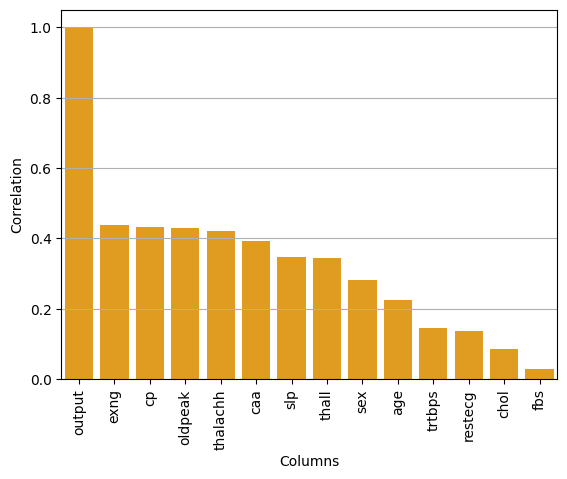

In [11]:
# Correlation values with output column
corr_vals = df.corrwith(df["output"]).abs().sort_values(ascending=False)
# Visualization
sns.barplot(x=corr_vals.index, y=corr_vals.values, color='orange', )
plt.grid(axis="y")
plt.xticks(rotation=90)
plt.xlabel("Columns")
plt.ylabel("Correlation")
plt.show()

# Split values for **train** and **validation**

![train valid](https://miro.medium.com/v2/resize:fit:388/1*QSXxOderidihfo1itIE7cw.png)

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

X = df.drop("output", axis=1)
y = df["output"].copy()

spliter = StratifiedShuffleSplit(n_splits=1, test_size=0.12, random_state=42)

for train_index, test_index in spliter.split(X, y):
  Xtrain, Xtest = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y[train_index], y[test_index]

print("Xtrain shape:", Xtrain.shape)
print("Xtest shape:", Xtest.shape)

Xtrain shape: (266, 13)
Xtest shape: (37, 13)
